In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/adult.csv",1,",")
# data = [df]

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
data = [df]

# Convert salary to integer

In [6]:
salary_map={' <=50K':1,' >50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


# convert sex into integer

In [8]:
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1


# Find correlation between columns

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [11]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

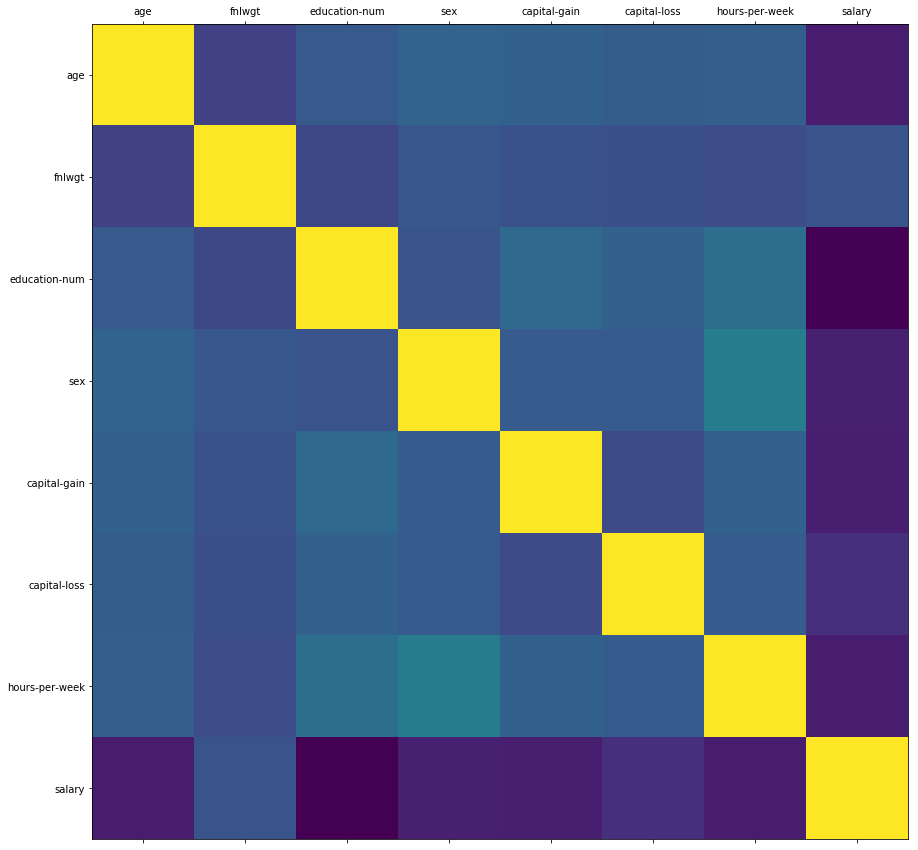

In [12]:
plot_correlation(df)

# Categorise in US and Non-US candidates

In [13]:
df[['country','salary']].groupby(['country']).mean()

,salary
country,
?,0.749571
Cambodia,0.631579
Canada,0.677686
China,0.733333
Columbia,0.966102
Cuba,0.736842
Dominican-Republic,0.971429
Ecuador,0.857143
El-Salvador,0.915094


# Drop empty value marked as '?'

In [14]:
df.shape

(32561, 15)

In [15]:
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

In [16]:
df.shape

(30162, 15)

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1


In [18]:
for dataset in data:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'

In [19]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,US,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,US,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,US,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,US,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Non-US,1


# Convert country in integer¶

In [20]:
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)

In [21]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1


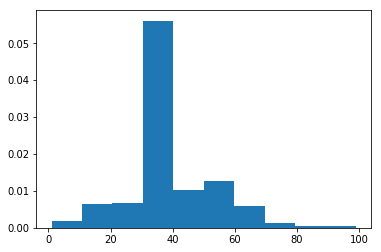

In [22]:
x= df['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

In [23]:
import seaborn as sns
sns.set() # setting seaborn default for plots

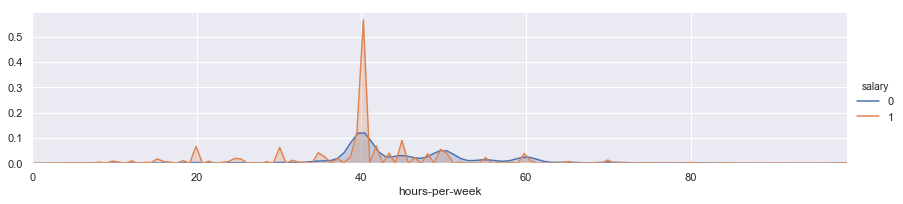

In [24]:

facet = sns.FacetGrid(df, hue="salary",aspect=4)
facet.map(sns.kdeplot,'hours-per-week',shade= True)
facet.set(xlim=(0, df['hours-per-week'].max()))
facet.add_legend()
 
plt.show()

In [25]:
df[['relationship','salary']].groupby(['relationship']).mean()

,salary
relationship,
Husband,0.544331
Not-in-family,0.893477
Other-relative,0.960630
Own-child,0.985670
Unmarried,0.933686
Wife,0.506401


In [26]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.892738
Married-AF-spouse,0.523810
Married-civ-spouse,0.545041
Married-spouse-absent,0.916216
Never-married,0.951676
Separated,0.929712
Widowed,0.903265


# Categorise marital-status into single and couple

In [27]:
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

In [28]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [29]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.545009
Single,0.931637


In [30]:
df[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship             
Couple          Husband         0.544331
                Not-in-family   0.714286
                Other-relative  0.857143
                Own-child       0.821429
                Wife            0.506401
Single          Not-in-family   0.893802
                Other-relative  0.976623
                Own-child       0.988818
                Unmarried       0.933686

In [31]:
df[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship    marital-status          
 Husband        Couple          0.544331
 Not-in-family  Couple          0.714286
                Single          0.893802
 Other-relative Couple          0.857143
                Single          0.976623
 Own-child      Couple          0.821429
                Single          0.988818
 Unmarried      Single          0.933686
 Wife           Couple          0.506401

In [32]:
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})

In [33]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [34]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1


# Analyse race

In [36]:
df[['race','salary']].groupby('race').mean()

,salary
race,
Amer-Indian-Eskimo,0.881119
Asian-Pac-Islander,0.722905
Black,0.870075
Other,0.909091
White,0.736282


In [37]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}


df['race']= df['race'].map(race_map)

In [38]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1


In [39]:
df[['occupation','salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.866165
Armed-Forces,0.888889
Craft-repair,0.774690
Exec-managerial,0.514780
Farming-fishing,0.883721
Handlers-cleaners,0.938519
Machine-op-inspct,0.875381
Other-service,0.958904
Priv-house-serv,0.993007


In [40]:
df[['workclass','salary']].groupby(['workclass']).mean()

,salary
workclass,
Federal-gov,0.612937
Local-gov,0.705370
Private,0.781208
Self-emp-inc,0.441341
Self-emp-not-inc,0.714286
State-gov,0.731040
Without-pay,1.000000


In [41]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)

In [42]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,private


In [43]:
df[['employment_type','salary']].groupby(['employment_type']).mean()

,salary
employment_type,
govt,0.692702
private,0.781208
self_employed,0.632242
without_pay,1.000000


In [44]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

df['employment_type'] = df['employment_type'].map(employment_map)

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1


In [46]:
df[['education','salary']].groupby(['education']).mean()

,salary
education,
10th,0.928049
11th,0.943702
12th,0.923077
1st-4th,0.960265
5th-6th,0.958333
7th-8th,0.937163
9th,0.945055
Assoc-acdm,0.746032
Assoc-voc,0.736802


In [47]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)

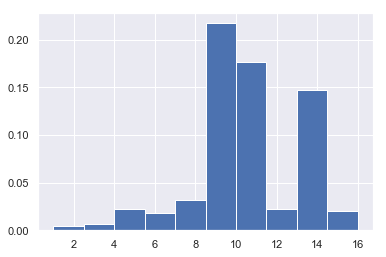

In [48]:
x= df['education-num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

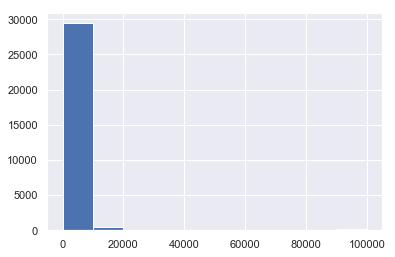

In [49]:
x=df['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

In [50]:
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

In [51]:
df.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


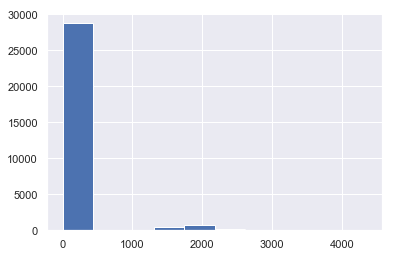

In [52]:
x=df['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [53]:
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

In [54]:
df.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


In [55]:
df['age'].count()

30162

# Pickle로 저장하기

In [56]:
df.to_pickle("../data/adult.pkl")

# dataframe 컬럼 순서변경

In [58]:
columnList = ['age', 'fnlwgt', 'education-num','marital-status','relationship','race','sex','capital-gain','capital-loss','hours-per-week','country','employment_type','salary']

In [59]:
df = df[columnList]

In [60]:
df.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,employment_type,salary
0,39,77516,13,1,3,0,1,1,0,40,1,0,1
1,50,83311,13,0,2,0,1,0,0,13,1,2,1
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


In [62]:
df= df.drop(['fnlwgt'],axis=1)

In [63]:
df.head()

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,employment_type,salary
0,39,13,1,3,0,1,1,0,40,1,0,1
1,50,13,0,2,0,1,0,0,13,1,2,1
2,38,9,1,3,0,1,0,0,40,1,1,1
3,53,7,0,2,3,1,0,0,40,1,1,1
4,28,13,0,1,3,0,0,0,40,0,1,1


In [65]:
df.to_csv("../data/adultpre.csv")